# Tutorial - Machine Learning para Economistas
## Tutorial 3 - Parte 2

El objetivo es graficar con matplotlib.

Matplotlib es la librería base de graficación, sobre la cual se montan otras librerías. Dentro de Matplotlib, usamos la dependencia "pyplot" que se instala con la librería. Por convención importamos así:

In [2]:
#!pip install matplotlib
import matplotlib.pyplot as plt # importamos la librería gráfica. plt es el nombre por convención que se le asigna

Matplotlib genera los gráficos sobre dos objetos interrelacionados:
- **Figure**: la hoja en blanco, el recuadro que contiene hacia adentro el/los gráfico/s. En términos prácticos esto ocurre detrás de escenas, pero es lo que permite dibujar el gráfico.
- **Axes**: el gráfico en sí, los ejes y la informacíon graficada. La representación de la información sobre ejes.

Las partes de un gráfico
<img src="https://matplotlib.org/stable/_images/anatomy.png"
     width=500/>

Hay esencialmente dos maneras de graficar con Matplotlib:
- **Estilo pyplot**: simple y rápida para figuras que no son muy avanzadas. Quizás más fácil para empezar.
- **Estilo orientado-objetos**: un poco más complejo pero necesario para figuras que requieren mucha customización.

En cuanto al resultado estético, con ambos se puede lograr la misma calidad. Para dar los primeros pasos es indistinto cual se use. Sin embargo, el estilo orientado a objetos es necesario para figuras más complejas donde hay varios gráficos (subplots) y es necesario definir parámetros distintos para cada par de ejes (2D)

### Graficar con matplotlib

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import os
os.chdir("/Users/tomaspacheco/Library/CloudStorage/GoogleDrive-tpacheco@udesa.edu.ar/Mi unidad/UdeSA/MachineLearningEcon/Tutoriales/viejo/T03/")

In [8]:
# Abrimos el archivo de potencia energética instalada en el país
df = pd.read_excel("potencia_instalada.xlsx")
# exploren la base

In [14]:
# Agregamos (collapse) a nivel de tipo de fuente
df_fuente = df.groupby(by=["periodo","fuente_generacion"]).agg({"potencia_instalada_mw":"sum"})
df_fuente.reset_index(inplace=True)
df_fuente.sample(5)

,periodo,fuente_generacion,potencia_instalada_mw
149,2019-04-01,Nuclear,1755.000
76,2017-05-01,Hidráulica,11101.380
55,2016-11-01,Térmica,20764.067
22,2016-03-01,Renovable,658.790
131,2018-06-01,Térmica,24374.890


In [16]:
df_fuente.shape

(152, 3)

Vamos a graficar dos líneas, así que definimos vector X e Y para cada una. Vamos a graficar la potencia instalada de generación por fuente Renovable y fuente Térmica:

In [18]:
# Definimos  vectores  de datos  para  serie 1 (renovable)
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# Definimos  vectores  de datos  para  serie 2 (térmica)
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

# Nota: df[condicion][columna] selecciona la "columna" de la base que resulta de aplicar el filtro df[condicion].

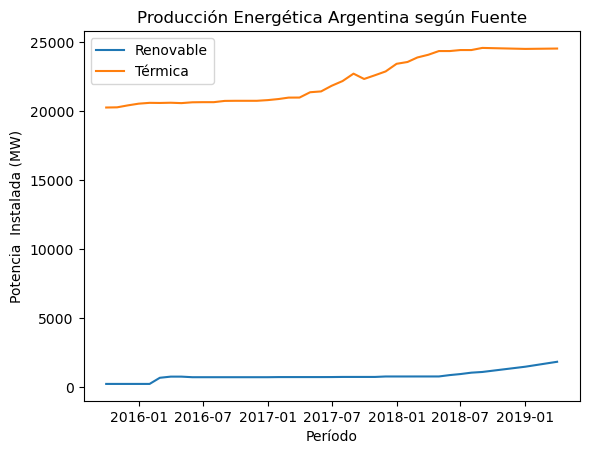

In [20]:
# Creamos el gráfico al estilo pyplot

plt.plot(x1, y1, label="Renovable") # serie 1
plt.plot(x2, y2, label="Térmica") # serie 2
# Estas  dos  líneas  estaran  sobre  el mismo  gráfico

# Modifico  labels
plt.xlabel("Período")
plt.ylabel("Potencia  Instalada (MW)")
plt.title("Producción Energética Argentina según Fuente")

# Agrego  leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_47355/2882315964.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


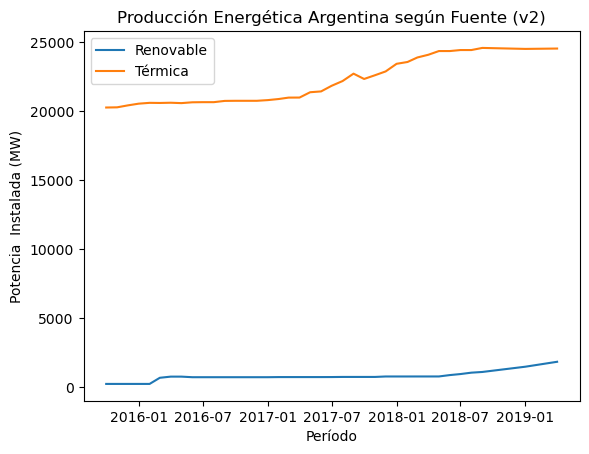

In [22]:
# Creamos el gráfico al estilo OO

# Creamos la figura y los axes
fig, ax = plt.subplots() # crear objetos

# Definimos series
ax.plot(x1, y1, label="Renovable") # Serie 
ax.plot(x2, y2, label="Térmica") # Serie 2

# Modificamos labels y título
ax.set_xlabel("Período")
ax.set_ylabel("Potencia  Instalada (MW)")
ax.set_title("Producción Energética Argentina según Fuente (v2)")

# Agregamos leyenda
ax.legend()
fig.show()

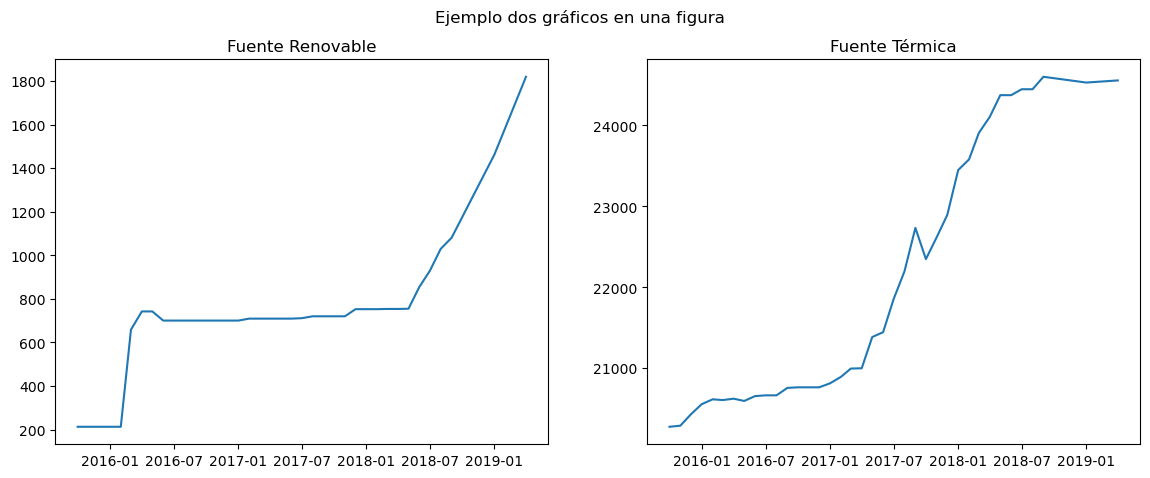

In [24]:
# Graficar múltiples gráficos estilo pyplot

# ejemplo 2 ax en un fig
plt.figure(figsize=(14, 5))

# Definimos primer gráfico
plt.subplot(121) # subplot(nrows, ncols, index, **kwargs) donde nrows=1, ncols=2, index=1
plt.plot(x1, y1)
plt.title("Fuente Renovable")

# Definimos segundo gráfico
plt.subplot(122)
plt.plot(x2, y2)
plt.title("Fuente Térmica")

# Definimos título general de la figura
plt.suptitle("Ejemplo dos gráficos en una figura")
plt.show()

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_47355/4073155617.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


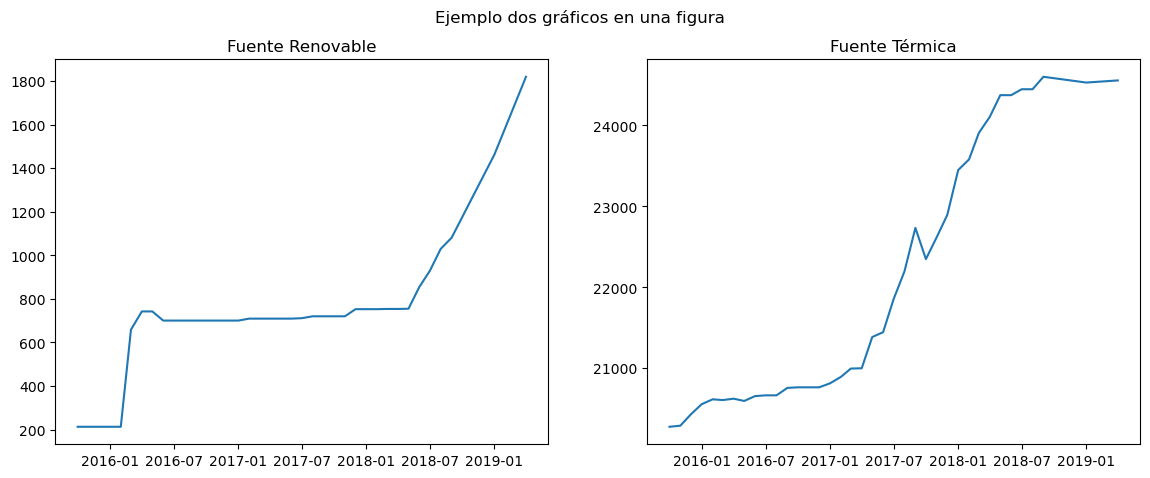

In [26]:
# Graficar múltiples gráficos estilo O-O

# ejemplo 2 ax en un fig
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

# Definimos primer gráfico
ax[0].plot(x1, y1)
ax[0].set_title("Fuente Renovable")

# Definimos segundo gráfico
ax[1].plot(x2, y2)
ax[1].set_title("Fuente Térmica")

# Definimos título general de la figura
fig.suptitle("Ejemplo dos gráficos en una figura")
fig.show()

### Otro ejemplo usando API de WB

Pueden ver la documentación [acá](https://wbdata.readthedocs.io/en/stable/)

In [34]:
#!pip3 install -U wbdata
import wbdata
import pandas as pd

In [40]:
import wbdata

In [44]:
# Podemos ver todos los datos disponibles
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [48]:
# Para este ejemplo vamos a usar source 14: indicadores de género
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [54]:
indicadores = {'HD.HCI.HLOS.FE':'scores_edu_fem','HD.HCI.HLOS.MA':'scores_edu_masc'}
#HD.HCI.HLOS.FE                   Harmonized Test Scores, Female
#HD.HCI.HLOS.MA                   Harmonized Test Scores, Male
data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [56]:
df.head()

scores_edu_fem  scores_edu_masc
country   date                                 
Argentina 2020      406.452667       409.942383
          2019             NaN              NaN
          2018      420.933350       427.109039
          2017      421.000000       427.000000
          2016             NaN              NaN

In [58]:
df

scores_edu_fem  scores_edu_masc
country       date                                 
Argentina     2020      406.452667       409.942383
              2019             NaN              NaN
              2018      420.933350       427.109039
              2017      421.000000       427.000000
              2016             NaN              NaN
              2015             NaN              NaN
              2014             NaN              NaN
              2013             NaN              NaN
              2012             NaN              NaN
              2011             NaN              NaN
              2010      414.181763       402.934509
United States 2020      514.136536       509.559448
              2019             NaN              NaN
              2018      523.395203       521.843384
              2017      523.000000       522.000000
              2016             NaN              NaN
              2015             NaN              NaN
              2014             NaN              NaN
              2013             NaN              NaN
              2012             NaN              NaN
              2011             NaN              NaN
              2010      511.146606       514.809570

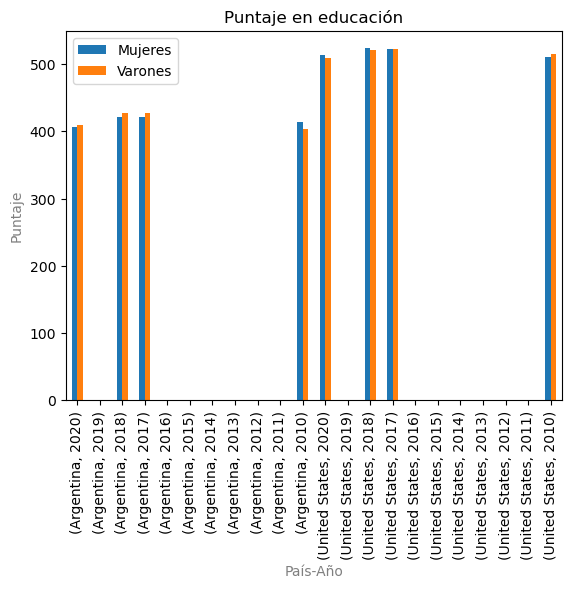

In [60]:
ax = df.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.legend(["Mujeres","Varones"])
# Acá estamos usando el index del df como xticklabels

Ahora buscamos hacer un gráfico solo con datos del año 2020

In [62]:
# Dejamos índice como columnas
df.reset_index(inplace=True)
df

,country,date,scores_edu_fem,scores_edu_masc
0,Argentina,2020,406.452667,409.942383
1,Argentina,2019,NaN,NaN
2,Argentina,2018,420.933350,427.109039
3,Argentina,2017,421.000000,427.000000
4,Argentina,2016,NaN,NaN
5,Argentina,2015,NaN,NaN
6,Argentina,2014,NaN,NaN
7,Argentina,2013,NaN,NaN
8,Argentina,2012,NaN,NaN
9,Argentina,2011,NaN,NaN


In [64]:
print(df["date"].dtype) # no es numérica
df_2020 = df[df["date"]=="2020"]
df_2020

object


,country,date,scores_edu_fem,scores_edu_masc
0,Argentina,2020,406.452667,409.942383
11,United States,2020,514.136536,509.559448


In [66]:
df_2020 = df_2020.set_index(["country", "date"])
df_2020

,,scores_edu_fem,scores_edu_masc
country,date,,
Argentina,2020,406.452667,409.942383
United States,2020,514.136536,509.559448


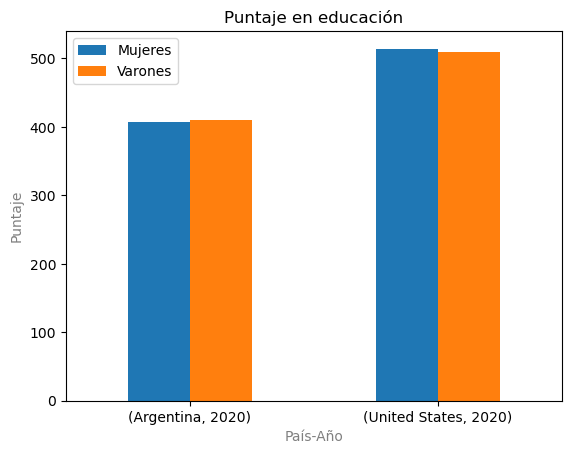

In [68]:
# Graficamos
ax = df_2020.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["Mujeres","Varones"])